## Little training monitor

Tails a `lighting_logs/version_X` directory for train/val loss.

In [81]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd


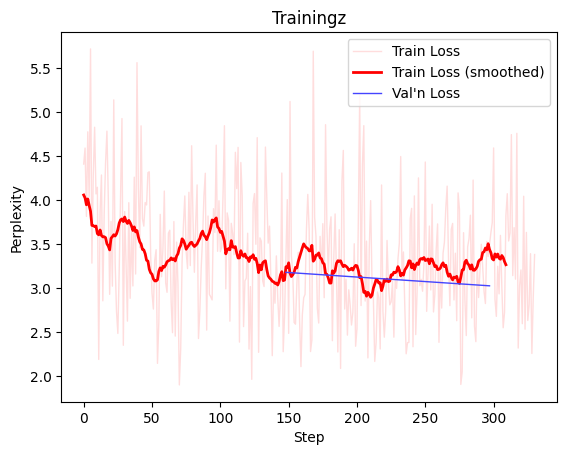

In [129]:
tdat = pd.read_csv('lightning_logs/version_8/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]

xspace = np.linspace(0, len(train), len(train))
fsz = max(100, len(train)//20)
filter = np.ones(fsz)/fsz
# filter =  np.linspace(0.25, 1.75, num=fsz)/fsz

import matplotlib.pyplot as plt

plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
if 'val_loss' in tdat.columns:
    val = tdat.val_loss[~np.isnan(tdat.val_loss)]
    plt.plot( val, label = 'Val\'n Loss', color='#44f', linewidth=1)

plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.legend(loc='upper right')
plt.title('Trainingz')
plt.show()


In [122]:
np.mean(tdat.train_loss[-100:])


3.1852711057662964

In [127]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

148    3.181533
Name: val_loss, dtype: float64

In [126]:
tdat[-100:]

,train_loss,length,epoch,step,val_loss
180,3.674170,19.0,0,17999,NaN
181,3.811457,11.0,0,18099,NaN
182,2.405770,40.0,0,18199,NaN
183,3.337521,16.0,0,18299,NaN
184,3.844359,36.0,0,18399,NaN
...,...,...,...,...,...
275,3.898479,25.0,0,27499,NaN
276,1.909962,37.0,0,27599,NaN
277,2.051769,40.0,0,27699,NaN
278,3.631703,16.0,0,27799,NaN
